In [1]:
#imports
import pandas as pd
from tabulate import tabulate

In [3]:
#read in the raw csv file
df = pd.read_csv("../data/scrapedData.csv", encoding= 'utf-8')

#some businesses could be part of the same category - drop the duplicates
df.info()
df = df.drop_duplicates()
df.info()

df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9598 non-null   object 
 1   alias         9598 non-null   object 
 2   name          9598 non-null   object 
 3   image_url     9457 non-null   object 
 4   is_closed     9598 non-null   bool   
 5   url           9598 non-null   object 
 6   review_count  9598 non-null   int64  
 7   categories    9598 non-null   object 
 8   rating        9598 non-null   float64
 9   latitude      9586 non-null   float64
 10  longitude     9586 non-null   float64
 11  distance      9598 non-null   float64
 12  address       9598 non-null   object 
 13  price         7774 non-null   float64
 14  is_delivery   9598 non-null   bool   
 15  is_pickup     9598 non-null   bool   
 16  category      9598 non-null   object 
dtypes: bool(3), float64(5), int64(1), object(8)
memory usage: 1.1+ MB
<clas

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,latitude,longitude,distance,address,price,is_delivery,is_pickup,category
0,HYdhgacLH57yHJ1b6TeBdQ,replay-airsoft-glen-burnie,Replay Airsoft,https://s3-media2.fl.yelpcdn.com/bphoto/hNSLVG...,False,https://www.yelp.com/biz/replay-airsoft-glen-b...,4,Airsoft,3.5,39.173650,-76.620870,11966.863685,"550 Crain Hwy N Unit 12/13 Glen Burnie, MD 21061",NaN,False,False,airsoft
1,IzLTsg6dxBSrHKdvUM1tMQ,charm-city-roller-girls-towson,Charm City Roller Girls,https://s3-media1.fl.yelpcdn.com/bphoto/gfbK7X...,False,https://www.yelp.com/biz/charm-city-roller-gir...,10,Amateur Sports Teams,4.0,39.402994,-76.602155,19318.321511,"722 Dulaney Valley Rd Ste 187 Towson, MD 21204",NaN,False,False,amateursportsteams


In [4]:
#create some dataframes that will be used throughout for analysis to avoid duplication
restaurants = df.loc[df["category"] == "restaurants"] # get df with all the restaurants
shops = df.loc[df["category"] == "shopping"] # get df with all the shops

In [5]:
#first, what are the highest rated, cheap restaurants to go to?

#sort by price ascending, then rating descending, then ABC order by name.
restaurantsSorted = restaurants.sort_values(['price', 'rating', 'name'], ascending=[True, False, True])
restaurantsSorted = restaurantsSorted[["name", "rating","price"]]
print(tabulate(restaurantsSorted.head(10), headers='keys', tablefmt='psql',showindex=False))

#I decided to not include this in the technical report as it likely is not something we care about for clustering

+-------------------------------+----------+---------+
| name                          |   rating |   price |
|-------------------------------+----------+---------|
| Coffee Talk Cafe              |      5   |       1 |
| Harmony Bakery                |      5   |       1 |
| Quize Quzeen                  |      5   |       1 |
| Taharka Brothers Factory      |      5   |       1 |
| Waffie                        |      5   |       1 |
| 1978 NY Pizza                 |      4.5 |       1 |
| Ariana Kabob Grill Food Truck |      4.5 |       1 |
| Arundel Donuts                |      4.5 |       1 |
| Aviation Deli & Grill         |      4.5 |       1 |
| Bean Rush Cafe                |      4.5 |       1 |
+-------------------------------+----------+---------+


In [99]:
#what are the highest rated, expensive restaurants to go to?  If we're looking to get fancy

#sort by price ascending, then rating descending, then ABC order by name.
restaurantsSorted = restaurants.sort_values(['price', 'rating', 'name'], ascending=[False, False, True])
restaurantsSorted = restaurantsSorted[["name", "rating","price"]]
print(tabulate(restaurantsSorted.head(10), headers='keys', tablefmt='psql',showindex=False))

#I decided to not include this in the technical report as it likely is not something we care about for clustering

+-----------------------------------+----------+---------+
| name                              |   rating |   price |
|-----------------------------------+----------+---------|
| Charleston                        |      4.5 |       4 |
| Arturo's Trattoria                |      4.5 |       3 |
| Magdalena A Maryland Bistro       |      4.5 |       3 |
| Orto                              |      4.5 |       3 |
| Petit Louis Bistro                |      4.5 |       3 |
| The Capital Grille                |      4.5 |       3 |
| Xenia Greek Kouzina               |      4.5 |       3 |
| Fogo de Chão Brazilian Steakhouse |      4   |       3 |
| Iron Bridge Wine Company          |      4   |       3 |
| La Cuchara                        |      4   |       3 |
+-----------------------------------+----------+---------+


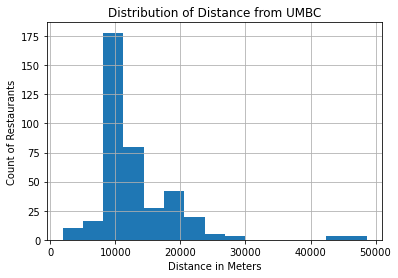

In [100]:
#we can look for trends in the data... how close are the bulk of the restaurants around UMBC?
hist = restaurants.hist(column="distance", bins=15) #histogram of the distance column to see the distribution

#set the labels
for ax in hist.flatten():
    ax.set_xlabel("Distance in Meters")
    ax.set_ylabel("Count of Restaurants")
    ax.set_title("Distribution of Distance from UMBC")


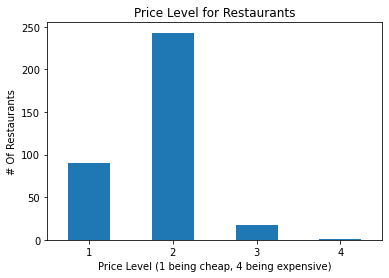

In [104]:
#we can look for trends in the data... what level of prices are the restaurants around UMBC?

restaurants["price"].value_counts().reindex([1,2,3,4]).plot(kind='bar', title="Price Level for Restaurants", ylabel="# Of Restaurants", xlabel="Price Level (1 being cheap, 4 being expensive)", rot=0);

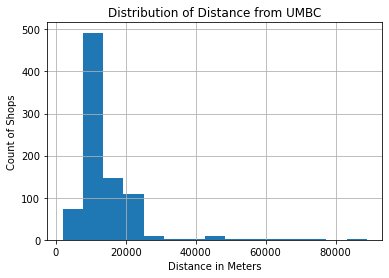

In [107]:
#we can look for trends in the data... how close are the bulk of the shops around UMBC?
hist = shops.hist(column='distance',bins=15)

for ax in hist.flatten():
    ax.set_xlabel("Distance in Meters")
    ax.set_ylabel("Count of Shops")
    ax.set_title("Distribution of Distance from UMBC")

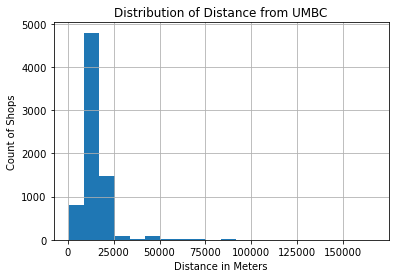

In [57]:
#we can look for trends in the data... how close are the bulk of the shops around UMBC?
noShops = df.loc[df["category"] != "shopping"] #first get df with all the restaurants
noShopsOrRestaurants = noShops.loc[noShops["category"] != "restaurants"]
noShopsOrRestaurantsDistance = noShopsOrRestaurants[["distance"]]

hist = noShopsOrRestaurantsDistance.hist(bins=20)

for ax in hist.flatten():
    ax.set_xlabel("Distance in Meters")
    ax.set_ylabel("Count of Activities")
    ax.set_title("Distribution of Distance from UMBC")
    

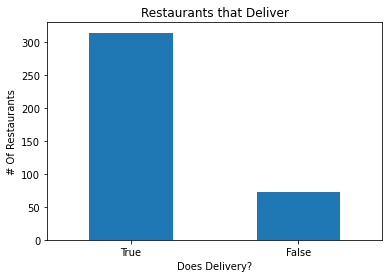

In [70]:
#The local businesses are more relevant for recruiting students that are going to live on campus.  For some, they
#may not have a car and it could be important to have businesses around that deliver
#Are there a lot of restaurants and shops that deliver?
restaurants["is_delivery"].value_counts().plot(kind='bar', title="Restaurants that Deliver", ylabel="# Of Restaurants", xlabel="Does Delivery?", rot=0);

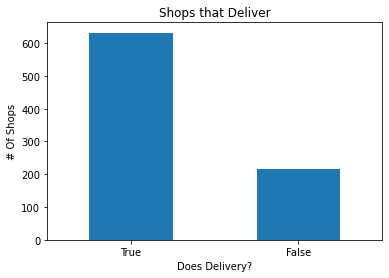

In [108]:
shops["is_delivery"].value_counts().plot(kind='bar', title="Shops that Deliver", ylabel="# Of Shops", xlabel="Does Delivery?", rot=0);

In [109]:
#we could also put together a list of categories available within the 15 miles of UMBC for both restaurants
#and shops:

def categoriesDF(dfToGetCategoriesFrom):
    categoriesFound = {}
    for index, row in dfToGetCategoriesFrom.iterrows():
        categories = row['categories'].split(', ')
        for category in categories:
            if category in categoriesFound:
                categoriesFound[category] += 1
            else:
                categoriesFound[category] = 1
    categoriesFound = {k: v for k, v in sorted(categoriesFound.items(), key=lambda item: item[1], reverse=True)}
    return pd.DataFrame(categoriesFound.items(), columns=["Category", "Number of Occurences"])
    
print(categoriesDF(shops))

                             Category  Number of Occurences
0              American (Traditional)                    85
1                  Breakfast & Brunch                    77
2                             Seafood                    67
3                          Sandwiches                    63
4                               Pizza                    55
5                        Coffee & Tea                    54
6                      American (New)                    54
7                             Italian                    49
8                                Bars                    49
9                          Sushi Bars                    41
10                            Mexican                    36
11                              Cafes                    36
12                           Bakeries                    36
13                             Indian                    35
14                      Mediterranean                    32
15                           Japanese   

In [111]:
#and for restaurants:
print(categoriesDF(restaurants))

                             Category  Number of Occurences
0                  Breakfast & Brunch                    43
1              American (Traditional)                    41
2                          Sandwiches                    31
3                             Seafood                    27
4                        Coffee & Tea                    27
5                      American (New)                    27
6                             Italian                    25
7                                Bars                    25
8                             Mexican                    24
9                       Mediterranean                    23
10                              Cafes                    22
11                         Sushi Bars                    22
12                              Pizza                    21
13                           Bakeries                    20
14                           Japanese                    18
15                             Indian   